In [1]:
!pwd

/mnt/c/wsl/github/mesa-forked/mesa


In [2]:
import datacollection_with_caching

In [3]:
# Has multi-dimensional arrays and matrices. Has a large collection of
# mathematical functions to operate on these arrays.

# Data manipulation and analysis.
import pandas as pd

# Data visualization tools.
import seaborn as sns

import mesa

In [4]:
def compute_gini(model):
    agent_wealths = [agent.wealth for agent in model.schedule.agents]
    x = sorted(agent_wealths)
    N = model.num_agents
    B = sum(xi * (N - i) for i, xi in enumerate(x)) / (N * sum(x))
    return 1 + (1 / N) - 2 * B


class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1

    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos, moore=True, include_center=False
        )
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def give_money(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        cellmates.pop(
            cellmates.index(self)
        )  # Ensure agent is not giving money to itself
        if len(cellmates) > 1:
            other = self.random.choice(cellmates)
            other.wealth += 1
            self.wealth -= 1
            if other == self:
                print("I JUST GAVE MONEY TO MYSELF HEHEHE!")

    def step(self):
        self.move()
        if self.wealth > 0:
            self.give_money()


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, N, width, height):
        super().__init__()
        self.num_agents = N
        self.grid = mesa.space.MultiGrid(width, height, True)
        self.schedule = mesa.time.RandomActivation(self)

        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)
            # Add the agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

        self.datacollector = datacollection_with_caching.DataCollector(
            model_reporters={"Gini": compute_gini}, agent_reporters={"Wealth": "wealth"}
        )

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

In [5]:
model = MoneyModel(100, 10, 10)
for i in range(1000):
    model.step()
model.datacollector.cache_remaining_data(model)

model._steps=0
model._steps=1
model._steps=2
model._steps=3
model._steps=4
model._steps=5
model._steps=6
model._steps=7
model._steps=8
model._steps=9
model._steps=10
model._steps=11
model._steps=12
model._steps=13
model._steps=14
model._steps=15
model._steps=16
model._steps=17
model._steps=18
model._steps=19
model._steps=20
model._steps=21
model._steps=22
model._steps=23
model._steps=24
model._steps=25
model._steps=26
model._steps=27
model._steps=28
model._steps=29
model._steps=30
model._steps=31
model._steps=32
model._steps=33
model._steps=34
model._steps=35
model._steps=36
model._steps=37
model._steps=38
model._steps=39
model._steps=40
model._steps=41
model._steps=42
model._steps=43
model._steps=44
model._steps=45
model._steps=46
model._steps=47
model._steps=48
model._steps=49
model._steps=50
model._steps=51
model._steps=52
model._steps=53
model._steps=54
model._steps=55
model._steps=56
model._steps=57
model._steps=58
model._steps=59
model._steps=60
model._steps=61
model._steps=62
mo

In [6]:
dir(model.datacollector)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agent_records',
 '_new_agent_reporter',
 '_new_model_reporter',
 '_new_table',
 '_record_agents',
 '_save_to_parquet',
 'add_table_row',
 'agent_reporters',
 'cache_interval',
 'cache_remaining_data',
 'collect',
 'get_agent_vars_dataframe',
 'get_model_vars_cache_dataframe',
 'get_model_vars_dataframe',
 'get_table_dataframe',
 'model_reporters',
 'model_vars',
 'model_vars_cache',
 'output_dir',
 'tables']

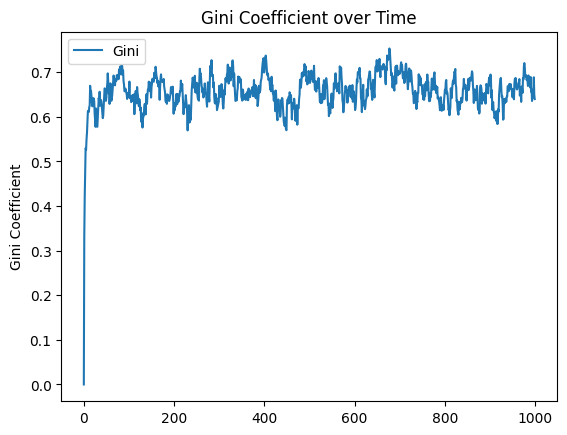

In [7]:
gini = model.datacollector.get_model_vars_dataframe()
# Plot the Gini coefficient over time
g = sns.lineplot(data=gini)
g.set(title="Gini Coefficient over Time", ylabel="Gini Coefficient");

In [8]:
agent_wealth = model.datacollector.get_agent_vars_dataframe()
agent_wealth.head()

,Step,AgentID,Wealth
Step,NaN,NaN,NaN
AgentID,NaN,NaN,NaN


In [9]:
import pyarrow.parquet as pq

# Read a single Parquet file
table = pq.read_table("output_dir/model_data_1.parquet")

# Convert to a pandas DataFrame
df = table.to_pandas()

# Display the DataFrame
print(df)

       Gini
0    0.0000
1    0.3306
2    0.4212
3    0.4780
4    0.5296
..      ...
96   0.6400
97   0.6526
98   0.6444
99   0.6492
100  0.6492

[101 rows x 1 columns]


In [10]:
import glob

import pyarrow.parquet as pq

# Get a list of all Parquet files
model_files = glob.glob("output_dir/model_data_*.parquet")
agent_files = glob.glob("output_dir/agent_data_*.parquet")

# Initialize lists to hold dataframes
model_dfs = []
agent_dfs = []

# Read and append each file to the list
for model_file in model_files:
    table = pq.read_table(model_file)
    df = table.to_pandas()
    model_dfs.append(df)

for agent_file in agent_files:
    table = pq.read_table(agent_file)
    df = table.to_pandas()
    agent_dfs.append(df)

# Concatenate all DataFrames
model_df = pd.concat(model_dfs, ignore_index=True)
agent_df = pd.concat(agent_dfs, ignore_index=True)

# Display the combined DataFrames
print(model_df)
print(agent_df)

       Gini
0    0.0000
1    0.3306
2    0.4212
3    0.4780
4    0.5296
..      ...
995  0.6524
996  0.6772
997  0.6878
998  0.6702
999  0.6804

[1000 rows x 1 columns]
       Wealth
0           1
1           1
2           1
3           1
4           1
...       ...
99995       1
99996       1
99997       0
99998       1
99999       0

[100000 rows x 1 columns]


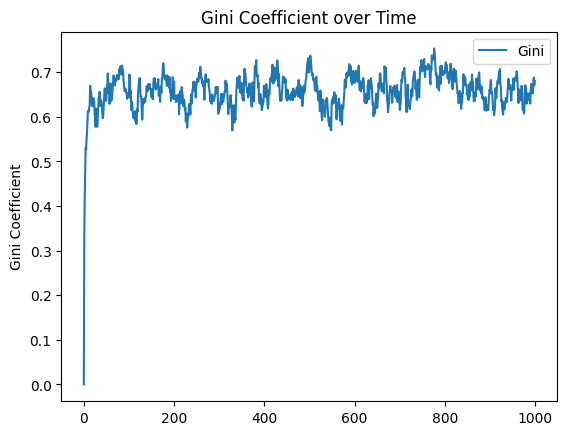

In [11]:
g = sns.lineplot(data=model_df)
g.set(title="Gini Coefficient over Time", ylabel="Gini Coefficient");

In [12]:
import pyarrow.parquet as pq


def process_parquet_file(file_path):
    # Read a single Parquet file
    table = pq.read_table(file_path)

    # Convert to a pandas DataFrame
    df = table.to_pandas()

    # Process the DataFrame (e.g., analyze, transform, etc.)
    # For example, just print the first few rows
    print(df.head())

    # Optionally, return or save the processed DataFrame
    return df


# Get a list of all Parquet files
model_files = glob.glob("output_dir/model_data_*.parquet")
agent_files = glob.glob("output_dir/agent_data_*.parquet")

# Process each file incrementally
for model_file in model_files:
    process_parquet_file(model_file)

for agent_file in agent_files:
    process_parquet_file(agent_file)

     Gini
0  0.0000
1  0.3306
2  0.4212
3  0.4780
4  0.5296
     Gini
0  0.6946
1  0.6848
2  0.6424
3  0.6594
4  0.6154
     Gini
0  0.6788
1  0.6416
2  0.6414
3  0.6464
4  0.6328
     Gini
0  0.6142
1  0.6306
2  0.6226
3  0.6378
4  0.6510
     Gini
0  0.6512
1  0.6582
2  0.6444
3  0.6696
4  0.6732
     Gini
0  0.7136
1  0.7310
2  0.7370
3  0.7268
4  0.7102
     Gini
0  0.6758
1  0.6930
2  0.6886
3  0.7034
4  0.6858
     Gini
0  0.6150
1  0.6206
2  0.6342
3  0.6640
4  0.6834
     Gini
0  0.7000
1  0.7150
2  0.7220
3  0.7152
4  0.7160
     Gini
0  0.6556
1  0.6782
2  0.6824
3  0.6520
4  0.6560
              Wealth
Step AgentID        
0    0             1
     1             1
     2             1
     3             1
     4             1
              Wealth
Step AgentID        
901  27            0
     6             0
     71            0
     68            0
     94            1
              Wealth
Step AgentID        
101  5             0
     27            0
     51            0
 

In [13]:
model_files

['output_dir/model_data_1.parquet',
 'output_dir/model_data_10.parquet',
 'output_dir/model_data_2.parquet',
 'output_dir/model_data_3.parquet',
 'output_dir/model_data_4.parquet',
 'output_dir/model_data_5.parquet',
 'output_dir/model_data_6.parquet',
 'output_dir/model_data_7.parquet',
 'output_dir/model_data_8.parquet',
 'output_dir/model_data_9.parquet']